In [1]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras import Sequential

from tensorflow.keras.models import Model
from tensorflow.keras.layers import UpSampling2D, MaxPooling2D, Flatten
import cv2
import os
import random
from tqdm import tqdm
import numpy as np
from keras.preprocessing import image
import os
import random
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, LSTM
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import BatchNormalization, Embedding
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import keras
import pandas
import cv2
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow import expand_dims
import gc
from keras import Sequential
from keras.layers import Dense, Flatten
from numpy.linalg import norm
from keras.initializers import Constant
# from keras.utils import load_img
# from keras.utils import img_to_array
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
# from keras.applications.resnet50 import VGG16

from keras.models import Model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
conv_base = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224, 3), pooling='avg')

94765736/94765736 [==============================] - 1s 0us/step


In [3]:
conv_base.trainable = False

In [4]:
model_resnet = Sequential()
model_resnet.add(conv_base)
model_resnet.add(Flatten())

In [5]:
model_resnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [6]:
def get_data(folder_path):
#         print(folder_path)
    try:
        img = image.load_img(folder_path, target_size=(224, 224,3))
        img_array = image.img_to_array(img)
        expanded_img = np.expand_dims(img_array,axis=0)
        preprocessed_img = preprocess_input(expanded_img)

#         result = model.predict(preprocessed_img, verbose=False).flatten()
        return preprocessed_img
    except:
        oov.append(folder_path)

In [7]:
images = []
array_insta_images = []
!pip install tqdm
oov = []
from tqdm import tqdm

In [8]:
for file in tqdm(os.listdir('/kaggle/input/insta-images-2/images_insta_final')):

     if get_data(os.path.join('/kaggle/input/insta-images-2/images_insta_final', file)) is not None:
            array_insta_images.append((get_data(os.path.join('/kaggle/input/insta-images-2/images_insta_final', file)), file.split('_')[1].split('.')[0]))
    

100%|██████████| 4612/4612 [03:47<00:00, 20.29it/s]


In [9]:
len(array_insta_images)
# print(array_insta_images)

4611

In [10]:
array_insta_images[0][0]

array([[[[116.061    , 103.221    ,  96.32     ],
         [116.061    , 103.221    ,  96.32     ],
         [117.061    , 104.221    ,  97.32     ],
         ...,
         [  4.060997 ,   8.221001 ,  28.32     ],
         [  4.060997 ,   8.221001 ,  22.32     ],
         [-38.939003 , -34.779    , -20.68     ]],

        [[116.061    , 103.221    ,  96.32     ],
         [116.061    , 103.221    ,  96.32     ],
         [116.061    , 103.221    ,  96.32     ],
         ...,
         [ 52.060997 ,  63.221    ,  74.32     ],
         [ 35.060997 ,  51.221    ,  59.32     ],
         [ 21.060997 ,  37.221    ,  45.32     ]],

        [[116.061    , 103.221    ,  96.32     ],
         [116.061    , 103.221    ,  96.32     ],
         [116.061    , 103.221    ,  96.32     ],
         ...,
         [-40.939003 , -29.779    , -12.68     ],
         [  6.060997 ,  19.221    ,  28.32     ],
         [-29.939003 , -16.779    ,  -7.6800003]],

        ...,

        [[ 56.060997 ,  44.221    ,  5

In [11]:
array_insta_images[0][1]

'918'

In [12]:
len(oov)

1

In [13]:
oov[0]

'/kaggle/input/insta-images-2/images_insta_final/.ipynb_checkpoints'

In [14]:
# # oov
# import pickle
# pickle.dump(oov, open("re-download-data.pkl", "wb"))

In [ ]:
int(oov[0].split("/")[-1].split("_")[1].split(".")[0])

In [ ]:
import requests
oov_images = []
for i in tqdm(range(209, len(oov))):
#     print(i)
    if oov[i].split("/")[-1].split("_")[1].split(".")[0] != 'checkpoints':
        with open("/kaggle/working/images_{}.png".format(int(oov[i].split("/")[-1].split("_")[1].split(".")[0])), 'wb') as f:
                url = df.iloc[int(oov[i].split("/")[-1].split("_")[1].split(".")[0])][1]
                data = requests.get(url)
                f.write(data.content)
#     except:
#         oov_images.append("/kaggle/working/images_{}".format(int(oov[i].split("/")[-1].split("_")[1].split(".")[0])))
    

In [51]:
!zip -r new_images.zip 


zip error: Nothing to do! (new_images.zip)


In [15]:
import pandas as pd
df = pd.read_csv("/kaggle/input/insta-datset/preprocessed_dataset_insta_posts.csv")

In [16]:
df.head()

,caption,displayUrl,hashtags,likesCount,combined_text,tags
0,Views from Conic hill on a blue bird day ☀️ \n...,https://instagram.fadb7-1.fna.fbcdn.net/v/t51....,scottishhighlands welivetoexplore lovescotland...,145.0,view conic hill blue bird day sun ️ ...,view conic hill blue bird day sun ️ ...
1,Today we went down into the forest and picked ...,https://scontent-sea1-1.cdninstagram.com/v/t51...,northumberlandnationalpark forestryengland for...,135.0,today go forest pick year christmas tree Ch...,today go forest pick year christmas tree Ch...
2,Throwback to this gorgeous morning over Ullswa...,https://instagram.fjnb2-1.fna.fbcdn.net/v/t51....,lakedistrict thelakedistrict cumbria welivetoe...,196.0,throwback gorgeous morning ullswater fresh dus...,throwback gorgeous morning ullswater fresh dus...
3,Fog making for some whimsical forest wanders ✨...,https://scontent-zrh1-1.cdninstagram.com/v/t51...,lakedistrict forestryengland whinlatter folkgr...,172.0,fog make whimsical forest wander sparkle ...,fog make whimsical forest wander sparkle ...
4,Just back from a glorious few days in the Tros...,https://instagram.fruh2-1.fna.fbcdn.net/v/t51....,neverstopexploring everydaylifeoutdoors explor...,200.0,back glorious day trossachs explore eat pie...,back glorious day trossachs explore eat pie...


In [17]:
df['combined_text'][1]

'today go forest pick year christmas tree    Christmas tree    obviously bring home jeep snow    snowman without snow    ️            northumberlandnationalpark britain northumberlandnationalpark forestryengland forestroad adventureisoutthere thediscoverer earthmagic earthfocus forestphotography hamsterley visitengland visitbritain everydaylifeoutdoor wanderlust neverstopexplore explorebritain    jeepuk jeep jeeplife jeepcherokee jeepxj folkgreen folknature welivetoexplore christmas2023 christmastree'

In [18]:
df['tags'] = None
data = []
corpus = []

In [19]:
def split_data(text):
    data.append(text.split(" "))

In [20]:
def make_corpus(data):
    corpus.append(data)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4611 entries, 0 to 4610
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   caption        4611 non-null   object 
 1   displayUrl     4611 non-null   object 
 2   hashtags       4611 non-null   object 
 3   likesCount     4611 non-null   float64
 4   combined_text  4611 non-null   object 
 5   tags           0 non-null      object 
dtypes: float64(1), object(5)
memory usage: 216.3+ KB


In [22]:
df['tags'] = df['combined_text']

In [23]:
df.isnull().sum()

caption          0
displayUrl       0
hashtags         0
likesCount       0
combined_text    0
tags             0
dtype: int64

In [24]:
df.dropna(axis=0, inplace=True)

In [25]:
df.shape

(4611, 6)

In [26]:
#removing respective images and making the no of images samr

In [27]:
import random


In [28]:
df.head()

,caption,displayUrl,hashtags,likesCount,combined_text,tags
0,Views from Conic hill on a blue bird day ☀️ \n...,https://instagram.fadb7-1.fna.fbcdn.net/v/t51....,scottishhighlands welivetoexplore lovescotland...,145.0,view conic hill blue bird day sun ️ ...,view conic hill blue bird day sun ️ ...
1,Today we went down into the forest and picked ...,https://scontent-sea1-1.cdninstagram.com/v/t51...,northumberlandnationalpark forestryengland for...,135.0,today go forest pick year christmas tree Ch...,today go forest pick year christmas tree Ch...
2,Throwback to this gorgeous morning over Ullswa...,https://instagram.fjnb2-1.fna.fbcdn.net/v/t51....,lakedistrict thelakedistrict cumbria welivetoe...,196.0,throwback gorgeous morning ullswater fresh dus...,throwback gorgeous morning ullswater fresh dus...
3,Fog making for some whimsical forest wanders ✨...,https://scontent-zrh1-1.cdninstagram.com/v/t51...,lakedistrict forestryengland whinlatter folkgr...,172.0,fog make whimsical forest wander sparkle ...,fog make whimsical forest wander sparkle ...
4,Just back from a glorious few days in the Tros...,https://instagram.fruh2-1.fna.fbcdn.net/v/t51....,neverstopexploring everydaylifeoutdoors explor...,200.0,back glorious day trossachs explore eat pie...,back glorious day trossachs explore eat pie...


In [30]:
import textacy
from textacy import preprocessing

In [31]:
def clean_text_split_data(data):
    cleaned = preprocessing.normalize.whitespace(data)
    return cleaned

In [32]:
new_data = []

df['tags'] = df['tags'].apply(clean_text_split_data)

In [33]:
df['tags']

0       view conic hill blue bird day sun ️ scottishhi...
1       today go forest pick year christmas tree Chris...
2       throwback gorgeous morning ullswater fresh dus...
3       fog make whimsical forest wander sparkle laked...
4       back glorious day trossachs explore eat pie wa...
                              ...                        
4606    entry 1 skf natureही ईश्वर है na jaane kitna p...
4607    repost repost ・・・ pune plogger feature tweet m...
4608    hey forget bottle grimacing face grimace face ...
4609                                   garbage everywhere
4610    week 4 day 1 dighi hills pune place many peopl...
Name: tags, Length: 4611, dtype: object

In [34]:
df['tags_2'] = df['tags']

In [35]:
df['tags'] = df['tags'].apply(split_data)

In [29]:
!pip install textacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for floret~=0.10.0 from https://files.pythonhosted.org/packages/16/ee/388a5c76c9292f4bef85d7ef895005bb39a0899f8004e9daceb57b2bb0c9/floret-0.10.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for jellyfish>=0.8.0 from https://files.pythonhosted.org/packages/26/87/8d31224804af9dfa7b34657e083b67b24b322c41dd9464b52218c1a33890/jellyfish-1.0.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 51.0 MB/s eta 0:00:00


In [36]:
data[0]

['view',
 'conic',
 'hill',
 'blue',
 'bird',
 'day',
 'sun',
 '️',
 'scottishhighland',
 'scotland',
 'scottishhighland',
 'welivetoexplore',
 'lovescotland',
 'trossachs',
 'visitscotland',
 'exploremore',
 'scotland',
 'thediscoverer',
 'earthfocus',
 'earthoutdoor',
 'neverstopexplore',
 'scotlandexplore',
 'hiddenscotland',
 'welivetodiscover',
 'conichill',
 'lovesscotland',
 'exploreeverything',
 'scotlandtravel']

In [37]:
data[0]

['view',
 'conic',
 'hill',
 'blue',
 'bird',
 'day',
 'sun',
 '️',
 'scottishhighland',
 'scotland',
 'scottishhighland',
 'welivetoexplore',
 'lovescotland',
 'trossachs',
 'visitscotland',
 'exploremore',
 'scotland',
 'thediscoverer',
 'earthfocus',
 'earthoutdoor',
 'neverstopexplore',
 'scotlandexplore',
 'hiddenscotland',
 'welivetodiscover',
 'conichill',
 'lovesscotland',
 'exploreeverything',
 'scotlandtravel']

In [38]:
make_corpus(data)

In [39]:
len(corpus[0])

4611

In [40]:
corpus[0][0]

['view',
 'conic',
 'hill',
 'blue',
 'bird',
 'day',
 'sun',
 '️',
 'scottishhighland',
 'scotland',
 'scottishhighland',
 'welivetoexplore',
 'lovescotland',
 'trossachs',
 'visitscotland',
 'exploremore',
 'scotland',
 'thediscoverer',
 'earthfocus',
 'earthoutdoor',
 'neverstopexplore',
 'scotlandexplore',
 'hiddenscotland',
 'welivetodiscover',
 'conichill',
 'lovesscotland',
 'exploreeverything',
 'scotlandtravel']

In [41]:
from gensim.models import FastText

In [42]:
model4 = FastText(vector_size=300, window=10, min_count=1, hs=1, sg=0)

In [43]:
model4.build_vocab(corpus_iterable=data) 

In [44]:
total_words = model4.corpus_total_words

In [45]:
model4.train(corpus_iterable=data, total_words=total_words, epochs=60)

(14720795, 15199500)

In [46]:
model4.wv.most_similar('like')

[('liked', 0.7017726302146912),
 ('likesforlike', 0.5599256753921509),
 ('unlike', 0.5103853344917297),
 ('likely', 0.47172415256500244),
 ('dreamlike', 0.44267967343330383),
 ('vike', 0.4391699731349945),
 ('likeminded', 0.3939208984375),
 ('spike', 0.32647767663002014),
 ('eke', 0.3226575553417206),
 ('shrike', 0.31235718727111816)]

In [47]:
vocab = model4.wv.index_to_key
# vocab = list(vocab.wv.index_to_key_list())

In [48]:
len(vocab)

15737

In [49]:
maxlen=-1
for i in data:
    if len(i) > maxlen:
        maxlen = len(i)
        

In [50]:
maxlen

244

In [51]:
from keras.preprocessing.text import one_hot,Tokenizer
tok = Tokenizer()

In [52]:
df.isnull().sum()

caption             0
displayUrl          0
hashtags            0
likesCount          0
combined_text       0
tags             4611
tags_2              0
dtype: int64

In [53]:
tok.fit_on_texts(df['tags_2'])

In [54]:
vocab_size = len(tok.word_index) + 1

In [55]:
encd_revs = tok.texts_to_sequences(df['tags_2'])

In [56]:
from keras.preprocessing.sequence import pad_sequences


In [57]:
pad_revs = pad_sequences(encd_revs, maxlen=maxlen, padding='post')

In [58]:
embd_dims =  300

In [59]:
word_vec_dict = {}

for word in vocab:
    word_vec_dict[word] = model4.wv.get_vector(word)

In [60]:
embd_matrix = np.zeros(shape=(vocab_size, embd_dims))
for word, i in tok.word_index.items():
    if word in vocab:
        embd = word_vec_dict[word]
        if embd is not None:
            embd_matrix[i]=embd

In [61]:
model_lstm=Sequential()
model_lstm.add(Embedding(input_dim=vocab_size,output_dim=embd_dims,input_length=maxlen,embeddings_initializer=Constant(embd_matrix)))
model_lstm.add(LSTM(100, return_sequences=True))
model_lstm.add(Flatten())
# model.add(Dense(128))
# model.add(Dense())

In [62]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 244, 300)          4719300   
                                                                 
 lstm (LSTM)                 (None, 244, 100)          160400    
                                                                 
 flatten_1 (Flatten)         (None, 24400)             0         
                                                                 
Total params: 4879700 (18.61 MB)
Trainable params: 4879700 (18.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/tmp/ipykernel_42/2612341092.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['likesCount'], kde=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


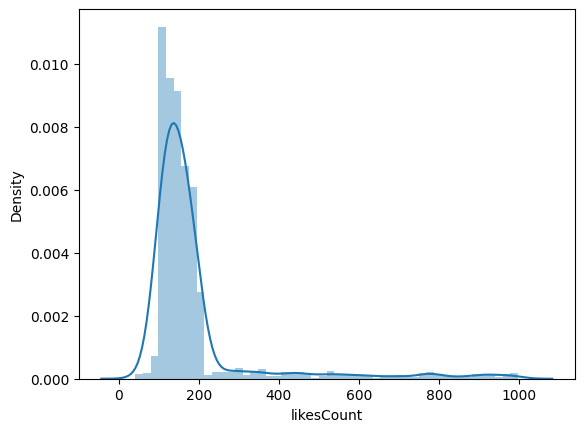

In [63]:
import seaborn as sns
sns.distplot(df['likesCount'], kde=True)
score = df['likesCount']

In [82]:
from sklearn.preprocessing import PowerTransformer

In [83]:
pt_trnf = PowerTransformer()

In [84]:
score_trnf = pt_trnf.fit_transform(score.values.reshape(-1,1))

In [85]:
len(score_trnf)

4611

In [86]:
images_without_index = []
for i in array_insta_images:
    images_without_index.append(i[0])

In [87]:
len(images_without_index)

4611

/tmp/ipykernel_42/2569913373.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(score_trnf, kde=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

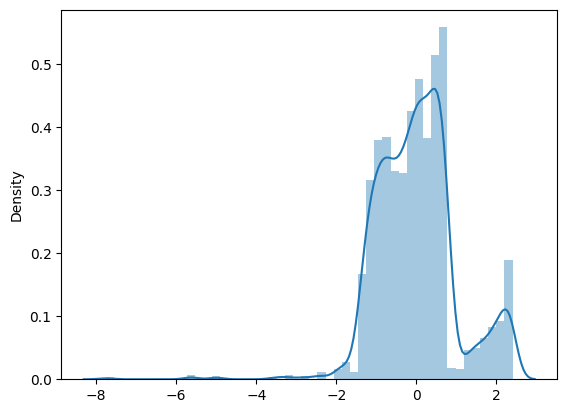

In [88]:
import seaborn as sns
sns.distplot(score_trnf, kde=True)

In [89]:
#Extract image names and their index positions sep acc to train and test split
len(pad_revs)

4611

In [90]:
y = df['likesCount']

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, y_train, X_test, y_test = train_test_split(pad_revs, y, test_size=0.2, random_state=0)

In [93]:
resnet_input = Input(shape=(224,224,3))
lstm_input = Input(shape=(maxlen,))
# shoes_input = Input(shape=(128,128,3), name='shoes_input')

# Connect the existing models to the new Input layers
# outwear_layer = model_outwear(outwear_input)
# pants_layer = model_pants(pants_input)
# shoes_layer = model_shoes(shoes_input)
resnet_layer = model_resnet(resnet_input)
lstm_layer = model_lstm(lstm_input)

In [94]:
combinedInput = concatenate([resnet_layer, lstm_layer])

In [95]:
x = Flatten()(combinedInput)
x = Dense(256, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
# x = BatchNormalization()(x)
# x = Dropout(0.2)(x)
x = Dense(1, activation='linear')(x)

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

In [97]:
model = Model(inputs=[resnet_input, lstm_input], outputs=x)

In [98]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=[keras.metrics.MeanAbsolutePercentageError()])

In [99]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="min",
    baseline=None,
    restore_best_weights=False
)

In [100]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 244)]                0         []                            
                                                                                                  
 sequential (Sequential)     (None, 2048)                 2358771   ['input_4[0][0]']             
                                                          2                                       
                                                                                                  
 sequential_1 (Sequential)   (None, 24400)                4879700   ['input_5[0][0]']       

In [101]:
# array_insta_images = np.array(array_insta_images)
array_insta_images[0][0]

array([[[[116.061    , 103.221    ,  96.32     ],
         [116.061    , 103.221    ,  96.32     ],
         [117.061    , 104.221    ,  97.32     ],
         ...,
         [  4.060997 ,   8.221001 ,  28.32     ],
         [  4.060997 ,   8.221001 ,  22.32     ],
         [-38.939003 , -34.779    , -20.68     ]],

        [[116.061    , 103.221    ,  96.32     ],
         [116.061    , 103.221    ,  96.32     ],
         [116.061    , 103.221    ,  96.32     ],
         ...,
         [ 52.060997 ,  63.221    ,  74.32     ],
         [ 35.060997 ,  51.221    ,  59.32     ],
         [ 21.060997 ,  37.221    ,  45.32     ]],

        [[116.061    , 103.221    ,  96.32     ],
         [116.061    , 103.221    ,  96.32     ],
         [116.061    , 103.221    ,  96.32     ],
         ...,
         [-40.939003 , -29.779    , -12.68     ],
         [  6.060997 ,  19.221    ,  28.32     ],
         [-29.939003 , -16.779    ,  -7.6800003]],

        ...,

        [[ 56.060997 ,  44.221    ,  5

In [102]:
# images_without_index[0][0][0]

In [ ]:
pad_revs[0]

In [104]:
model.fit(x=[images_without_index,pad_revs], y=score_trnf, epochs=200, callbacks=[callback])

ValueError: Data cardinality is ambiguous:
  x sizes: 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4611
  y sizes: 4611
Make sure all arrays contain the same number of samples.

In [105]:
len(images_without_index)

4611

In [ ]:
model.save('post-scorer.keras')

In [ ]:
model=tf.keras.saving.load_model('/kaggle/input/wardrobe-2/clothes (1).keras')

In [ ]:
def get_data_single(folder_path):
#     temp = []
    temp = []
    
    features = []
    X = []
    try:
#         for img in tqdm(os.listdir(folder_path)):
        img = image.load_img(os.path.join(folder_path), target_size=(128, 128, 3))
        img_array = image.img_to_array(img)
        img_array /= 255.
#             resize_array = cv2.resize(img_array, (128,128))
        temp.append(img_array)
    except:
        pass
#     for i in temp:
#         features.append(i)
#     X = np.array(temp).reshape(-1, 128, 128, 3)
#     X = X.astype('float32')
#     X /= 255
    return np.array(temp).reshape(-1, 128, 128, 3)

In [ ]:
outwear_input=get_data_single('/kaggle/input/clothes/R.jpeg')
pants_input=get_data_single('/kaggle/input/clothes/pants.png')
shoes_input=get_data_single('/kaggle/input/clothes/shoes.jpeg')

In [ ]:
outwear_input

In [ ]:
zipped_input = tf.data.Dataset.zip(((outwear_input,pants_input,shoes_input), ))

In [ ]:
y_pred = model.predict([outwear_input,pants_input,shoes_input])

In [ ]:
pred = pd.DataFrame(columns=['Values'])

In [ ]:
y_pred

In [ ]:
outwear = ['/kaggle/input/outwear-pics/R.jpeg','/kaggle/input/outwear-pics/outwear_2.jpeg', '/kaggle/input/outwear-pics/outwear_3.jpeg']
pants = ['/kaggle/input/pants-pics/pants.png','/kaggle/input/pants-pics/pants_2.webp', '/kaggle/input/pants-pics/pants_3.webp']
shoes = ['/kaggle/input/shoes-pics/shoes.jpeg','/kaggle/input/shoes-pics/shoes_2.jpeg', '/kaggle/input/shoes-pics/shoes_3.jpeg']

In [ ]:
clothes = []

In [ ]:
values=[]

In [ ]:
outwear[0]

In [ ]:
for i in range(3):
    for j in range(3):
        for k in range(3):
            if k==1:
                outwear_input=get_data_single(outwear[i])
            elif k==2 :
                pants_input=get_data_single(pants[j])
            elif k==3 :
                shoes_input=get_data_single(shoes[k])
            y_pred = model.predict([outwear_input,pants_input,shoes_input])
            values.append(y_pred[0][0])
            clothes.append([outwear[i], pants[j], shoes[k]])

In [ ]:
len(values)

In [ ]:
for value in range(len(values)):
    values[value] = round(values[value], 2)

In [ ]:
values 

In [ ]:
len(clothes[0])

In [ ]:
clothes[0]

In [ ]:
temp_2 = []

In [ ]:
for i in range(len(values)):
    temp_2.append((i,values[i]))

In [ ]:
temp_2

In [ ]:
from operator import itemgetter

In [ ]:
temp_2 = sorted(temp_2,key=itemgetter(1), reverse=True)

In [ ]:
temp_2

In [ ]:
len(temp_2)

In [ ]:
seen = set()
new = []
for i in range(len(temp_2)):
    if temp_2[i][1] not in seen:
        seen.add(temp_2[i][1])
        new.append(temp_2[i])

In [ ]:
new

In [ ]:
seen


In [ ]:
len(temp_2)

In [ ]:
temp_2

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img 
import cv2
for i in range(len(new)):
    index = new[i][0]
    for j in clothes[index]:
        print(j)
    print(new[i][1])
#         array = img.imread(j)
#         plt.imshow(array)
    print('-------------------------------------------------------------------------------------------------')

In [ ]:
for j in clothes[index]:
        print(j)
        array = img.imread(j)
        plt.imshow(array)

In [ ]:

array = img.imread('/kaggle/input/pants-pics/pants.png')
plt.imshow(array)

In [ ]:
array = img.imread('/kaggle/input/outwear-pics/R.jpeg')
plt.imshow(array)